In [28]:
#Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

#import supplementary visualizations code visuals.py
import visuals as vs

#Pretty display for notebooks
%matplotlib inline

in_file = 'G:\Udacity\Titanic Survival\Titanic_data.csv'
full_data = pd.read_csv(in_file)

display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# Store the 'Survived' feature into another variable
outcomes = full_data['Survived']
data = full_data.drop('Survived',axis=1)

#The new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


In [49]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

In [53]:
'''Question 1: Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?
Hint: Run the code cell below to see the accuracy of this prediction.'''

'Question 1: Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?\nHint: Run the code cell below to see the accuracy of this prediction.'

In [55]:
print accuracy_score(outcomes,predictions)

Predictions have an accuracy of 61.62%.


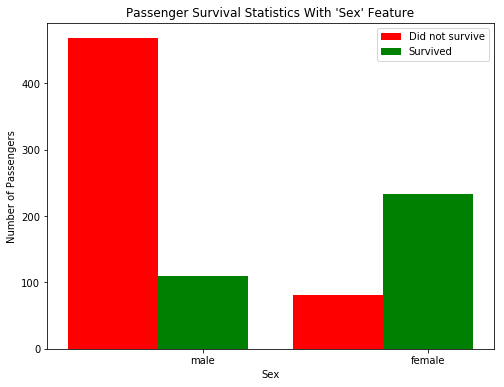

In [56]:
vs.survival_stats(data, outcomes, 'Sex')

In [62]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    #predictions = np.where(data['Sex']=='female',1,0)
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex']=='female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [ ]:
'''Question 2
How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?
Hint: Run the code cell below to see the accuracy of this prediction.'''

In [63]:
print accuracy_score(outcomes,predictions)

Predictions have an accuracy of 78.68%.


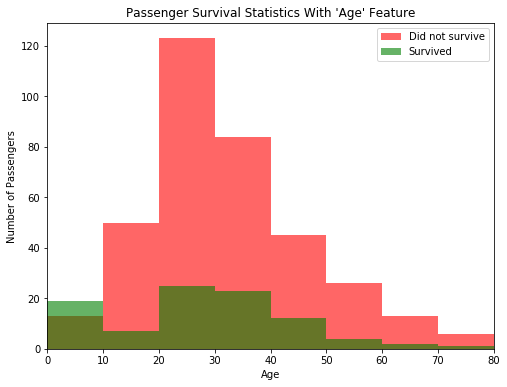

In [64]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [74]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if ((passenger['Sex']=='female') | ((passenger['Sex']=='male') & (passenger['Age']<10))):
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [75]:
'''Question 3
How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?
Hint: Run the code cell below to see the accuracy of this prediction.'''

'Question 3\nHow accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?\nHint: Run the code cell below to see the accuracy of this prediction.'

In [77]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


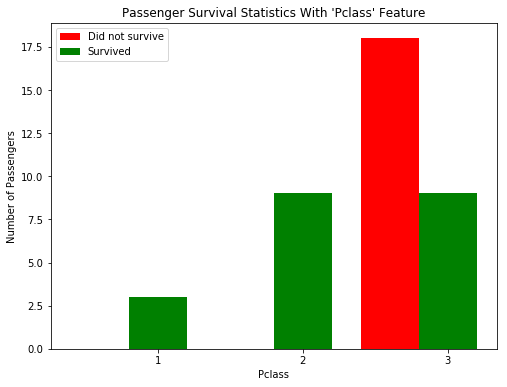

In [135]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'", "Age < 15"])

In [131]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if (passenger['Sex']=='female') | ((passenger['Sex']=='male') & (passenger['Age']<15) & (1<=passenger['Pclass']<=2)):
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

In [136]:
'''Question 4
Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?
Hint: Run the code cell below to see the accuracy of your predictions.'''

'Question 4\nDescribe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?\nHint: Run the code cell below to see the accuracy of your predictions.'

In [137]:
'''Answer
I tried using the variable which has less division for e.g. Sex is only 2 division. Next variable with less division was Pclass wiht values as 
1,2,3. Since we have assumed that all females survived. So inorder to increase the accuracy we will have to focus on male distribution across different variables.
Also we observed that males <10 years survived. I tried using Pclass across for a big age range and I found that the accuracy improves by atleast 80%.
I did check across other variables too like Embarked, Parch but the accuracy didnt improve'''

'Answer\nI tried using the variable which has less division for e.g. Sex is only 2 division. Next variable with less division was Pclass wiht values as \n1,2,3. Since we have assumed that all females survived. So inorder to increase the accuracy we will have to focus on male distribution across different variables.\nAlso we observed that males <10 years survived. I tried using Pclass across for a big age range and I found that the accuracy improves by atleast 80%.\nI did check across other variables too like Embarked, Parch but the accuracy didnt improve'

In [138]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.02%.


In [139]:
'''Question 5
Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.
'''

'Question 5\nThink of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.\n'

In [140]:
'''Answer: 
Predicting the stock next day would be ne of the example. Stock Price is the outcome variable. 
Two Features: Price of the stock yesterday and volatility measure or the volume of the stock traded'''

'Answer: \nPredicting the stock next day would be ne of the example. Stock Price is the outcome variable. \nTwo Features: Price of the stock yesterday and volatility measure or the volume of the stock traded'